# <font color='blue'>Projeto Semantix - Aplicação de Machine Learning na Análise do Transtorno do Espectro Autista</font>

🔹 quest1 ➔ Eu costumo notar pequenos sons quando outros não percebem.

🔹 quest2 ➔ Normalmente, concentro-me mais no todo do que nos pequenos detalhes.

🔹 quest3 ➔ Acho fácil fazer mais de uma coisa ao mesmo tempo.

🔹 quest4 ➔ Se houver uma interrupção, posso voltar ao que estava fazendo muito rapidamente.

🔹 quest5 ➔ Acho fácil "ler nas entrelinhas" quando alguém está falando comigo.

🔹 quest6 ➔ Eu sei como perceber se alguém que está me ouvindo está ficando entediado.

🔹 quest7 ➔ Quando estou lendo uma história, acho difícil entender as intenções dos personagens.

🔹 quest8 ➔ Gosto de coletar informações sobre categorias de coisas (por exemplo, tipos de carro, tipos de pássaro, tipos de trem, tipos de planta etc.)

🔹 quest9 ➔ Acho fácil perceber o que alguém está pensando ou sentindo apenas olhando para o seu rosto.

🔹 quest10 ➔ Acho difícil entender as intenções das pessoas.

🔹 0 ➔ não 1 ➔ sim

🔹 0 ➔ feminino 1 ➔ masculino

In [1]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Bibliotecas para pré-processamento e divisão de dados
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Bibliotecas para os modelos de machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Bibliotecas para métricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.cluster import KMeans

In [2]:
base = pd.read_csv('autism_screening.csv', delimiter=',')

### <font color='darkblue'>Primeira etapa da pré-modelagem: Verificar os tipos de dados, se tem colunas com dados faltantes, se tem valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.</font>

In [3]:
print( base.info(), '\n número de valores nulos em cada coluna: \n', base.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [4]:
base.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [5]:
base.dropna(subset = ['age'], inplace = True)

In [6]:
base['age'].isnull().sum()

np.int64(0)

In [7]:
cols_bin = ['jundice','austim','used_app_before','Class/ASD','gender']
for c in cols_bin:
    print(c, "->", base[c].dropna().unique()[:30])

jundice -> ['no' 'yes']
austim -> ['no' 'yes']
used_app_before -> ['no' 'yes']
Class/ASD -> ['NO' 'YES']
gender -> ['f' 'm']


In [8]:
mapeamento_sim_nao = {
    'yes': 1, 'no': 0,
    'YES': 1, 'NO': 0,
    't': 1, 'f': 0,
    'TRUE': 1, 'FALSE': 0,
    'True': 1, 'False': 0,
    '1': 1, '0': 0
}

mapeamento = {
    'f': 0, 'm': 1,}

In [9]:
# função auxiliar para mapear com segurança
def safe_map(series, mapping):
    return series.astype(str).str.strip().str.casefold().map(mapping) # normaliza strings e aplica map, valores não mapeados viram NaN

In [10]:
base['jundice'] = safe_map(base['jundice'], mapeamento_sim_nao)
base['austim'] = safe_map(base['austim'], mapeamento_sim_nao)
base['used_app_before'] = safe_map(base['used_app_before'], mapeamento_sim_nao)
base['Class/ASD'] = safe_map(base['Class/ASD'], mapeamento_sim_nao)
base['gender'] = safe_map(base['gender'], mapeamento)

In [11]:
# conferir se sobrou algo não mapeado
for c in cols_bin:
    n_na = base[c].isna().sum()
    print(f"{c}: {n_na} valores não mapeados (NaN)")

jundice: 0 valores não mapeados (NaN)
austim: 0 valores não mapeados (NaN)
used_app_before: 0 valores não mapeados (NaN)
Class/ASD: 0 valores não mapeados (NaN)
gender: 0 valores não mapeados (NaN)


In [12]:
for c in cols_bin:
    if base[c].dropna().isin([0,1]).all():
        pct0 = (base[c] == 0).mean()*100
        pct1 = (base[c] == 1).mean()*100
        print(f"{c}: {pct0:.2f}% 0, {pct1:.2f}% 1")
    else:
        print(f"{c}: contém valores além de 0/1 — verifique!")

jundice: 90.17% 0, 9.83% 1
austim: 87.04% 0, 12.96% 1
used_app_before: 98.29% 0, 1.71% 1
Class/ASD: 73.08% 0, 26.92% 1
gender: 47.86% 0, 52.14% 1


In [13]:
base[['jundice','austim','used_app_before','Class/ASD', 'gender']].head()

,jundice,austim,used_app_before,Class/ASD,gender
0,0,0,0,0,0
1,0,1,0,0,1
2,1,1,0,1,1
3,0,1,0,0,0
4,0,0,0,0,0


In [14]:
# Verificando as variaveis numéricas
for coluna in base.select_dtypes(include = int):
    print(f'\n coluna: {coluna}')
    print(base[coluna].unique())


 coluna: A1_Score
[1 0]

 coluna: A2_Score
[1 0]

 coluna: A3_Score
[1 0]

 coluna: A4_Score
[1 0]

 coluna: A5_Score
[0 1]

 coluna: A6_Score
[0 1]

 coluna: A7_Score
[1 0]

 coluna: A8_Score
[1 0]

 coluna: A9_Score
[0 1]

 coluna: A10_Score
[0 1]

 coluna: gender
[0 1]

 coluna: jundice
[0 1]

 coluna: austim
[0 1]

 coluna: used_app_before
[0 1]

 coluna: Class/ASD
[0 1]


In [15]:
# Verificando as variaveis categoricas
for coluna in base.select_dtypes(include = object):
    print(f'\n coluna: {coluna}')
    print(base[coluna].unique())


 coluna: ethnicity
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']

 coluna: contry_of_res
['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'Iceland' 'Nicaragua'
 'Hong Kong' 'Japan' 'Ukraine' 'Kazakhstan' 'AmericanSamoa' 'Uruguay'
 'Serbia' 'Portugal' 'Malaysia' 'Ecuador' 'Niger' 'Belgium' 'Bolivia'
 'Aruba' 'Finland' 'Turkey' 'Nepal' 'Indonesia' 'Angola' 'Azerbaijan'
 'Iraq' 'Czech Republic' 'Cyprus']

 coluna: age_desc
['18 and more']

 coluna: relation
['Self' 'Parent' '?' 'Health car

In [16]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         702 non-null    int64  
 1   A2_Score         702 non-null    int64  
 2   A3_Score         702 non-null    int64  
 3   A4_Score         702 non-null    int64  
 4   A5_Score         702 non-null    int64  
 5   A6_Score         702 non-null    int64  
 6   A7_Score         702 non-null    int64  
 7   A8_Score         702 non-null    int64  
 8   A9_Score         702 non-null    int64  
 9   A10_Score        702 non-null    int64  
 10  age              702 non-null    float64
 11  gender           702 non-null    int64  
 12  ethnicity        702 non-null    object 
 13  jundice          702 non-null    int64  
 14  austim           702 non-null    int64  
 15  contry_of_res    702 non-null    object 
 16  used_app_before  702 non-null    int64  
 17  result           702 

In [17]:
base.columns = ['quest1','quest2', 'quest3', 'quest4', 'quest5', 'quest6', 'quest7', 'quest8', 'quest9', 'quest10', 'idade', 'genero', 'etnia', 'icterícia', 'autismo', 'pais', 'triagem_antes', 'resultado', 'mais_18', 'respondido_por', 'classe/TEA']
base.head(5)

,quest1,quest2,quest3,quest4,quest5,quest6,quest7,quest8,quest9,quest10,...,genero,etnia,icterícia,autismo,pais,triagem_antes,resultado,mais_18,respondido_por,classe/TEA
0,1,1,1,1,0,0,1,1,0,0,...,0,White-European,0,0,United States,0,6.0,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,...,1,Latino,0,1,Brazil,0,5.0,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,...,1,Latino,1,1,Spain,0,8.0,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,0,White-European,0,1,United States,0,6.0,18 and more,Self,0
4,1,0,0,0,0,0,0,1,0,0,...,0,?,0,0,Egypt,0,2.0,18 and more,?,0


### <font color='darkblue'>Segunda etapa da pré-modelagem: análise univariada e análise bivariada</font>


 27.635327635327634 
 54.700854700854705 
 54.131054131054135


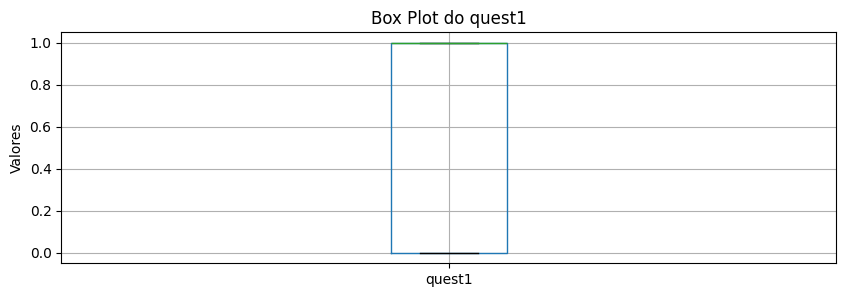

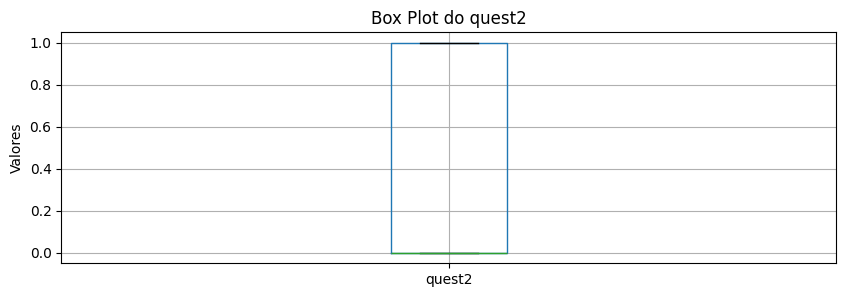

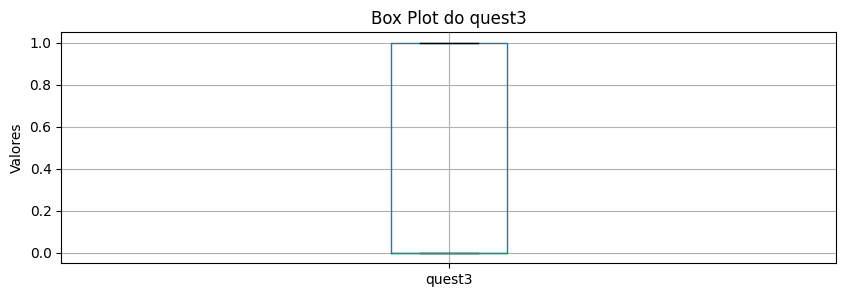

In [18]:
#Identificar variáveis com possíveis outliers

#média em porcentagem
a = (base['quest1'] == 0).mean() * 100
b = (base['quest2'] == 0).mean() * 100
c = (base['quest3'] == 0).mean() * 100

print('\n', a, '\n', b, '\n', c)

#grafico boxplot do quest1
plt.figure(figsize=(10, 3))
base.boxplot(column='quest1')
plt.title('Box Plot do quest1')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do quest2
plt.figure(figsize=(10, 3))
base.boxplot(column='quest2')
plt.title('Box Plot do quest2')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do quest3
plt.figure(figsize=(10, 3))
base.boxplot(column='quest3')
plt.title('Box Plot do quest3')
plt.ylabel('Valores')
plt.show()


 50.28490028490028 
 50.142450142450144 
 71.50997150997152


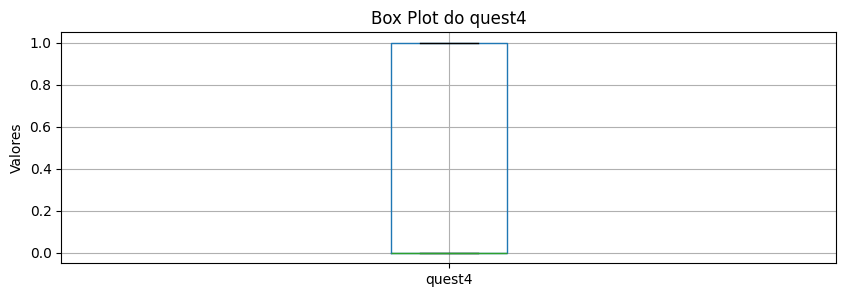

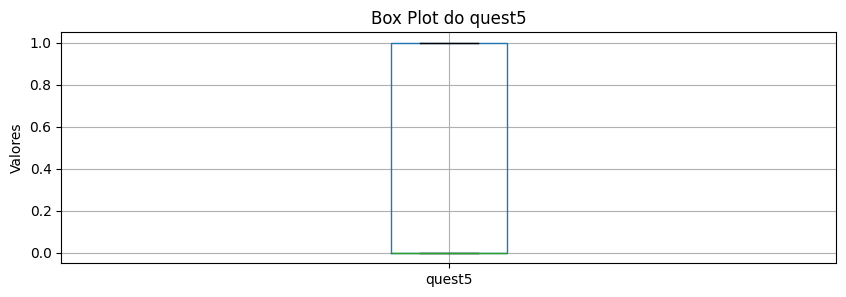

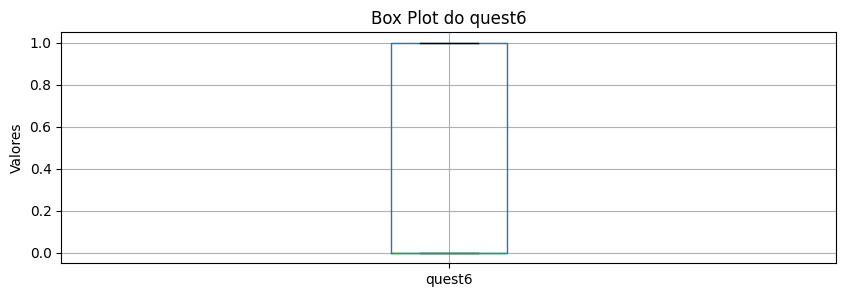

In [19]:
#Identificar variáveis com possíveis outliers

#média em porcentagem
d = (base['quest4'] == 0).mean() * 100
e = (base['quest5'] == 0).mean() * 100
f = (base['quest6'] == 0).mean() * 100

print('\n', d, '\n', e, '\n', f)

#grafico boxplot do quest4
plt.figure(figsize=(10, 3))
base.boxplot(column='quest4')
plt.title('Box Plot do quest4')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do quest5
plt.figure(figsize=(10, 3))
base.boxplot(column='quest5')
plt.title('Box Plot do quest5')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do quest6
plt.figure(figsize=(10, 3))
base.boxplot(column='quest6')
plt.title('Box Plot do quest6')
plt.ylabel('Valores')
plt.show()


 54.131054131054135 
 50.28490028490028 
 50.142450142450144 
 42.592592592592595


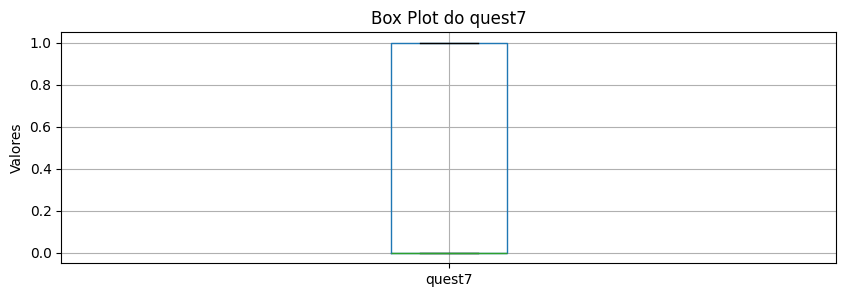

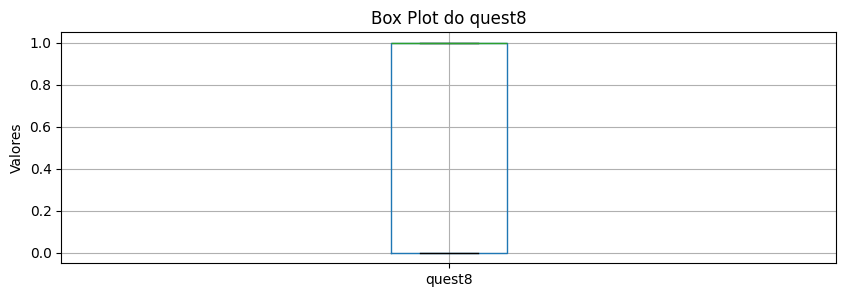

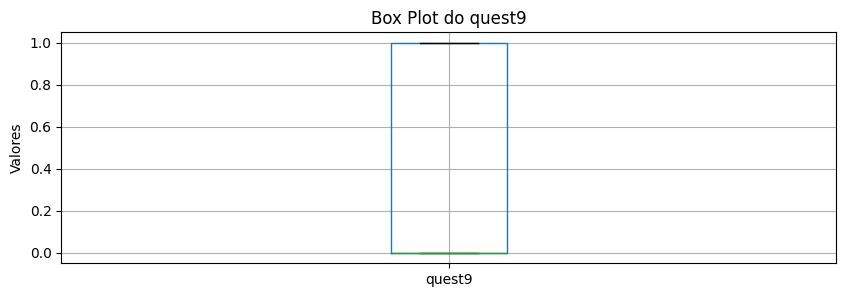

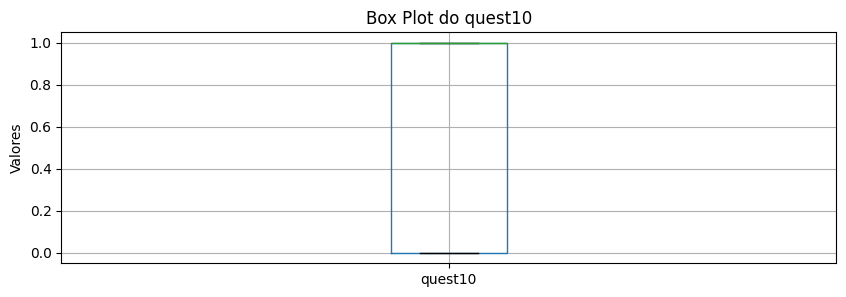

In [20]:
#Identificar variáveis com possíveis outliers

#média em porcentagem
g = (base['quest7'] == 0).mean() * 100
h = (base['quest8'] == 0).mean() * 100
i = (base['quest9'] == 0).mean() * 100
j = (base['quest10'] == 0).mean() * 100

print('\n', c, '\n', d, '\n', e, '\n', j)

#grafico boxplot do quest7
plt.figure(figsize=(10, 3))
base.boxplot(column='quest7')
plt.title('Box Plot do quest7')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do quest8
plt.figure(figsize=(10, 3))
base.boxplot(column='quest8')
plt.title('Box Plot do quest8')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do quest9
plt.figure(figsize=(10, 3))
base.boxplot(column='quest9')
plt.title('Box Plot do quest9')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do quest10
plt.figure(figsize=(10, 3))
base.boxplot(column='quest10')
plt.title('Box Plot do quest10')
plt.ylabel('Valores')
plt.show()

In [21]:
coluna = 'idade'

Q1 = base[coluna].quantile(0.25)
Q3 = base[coluna].quantile(0.75)
IRQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IRQ
limite_superior = Q3 + 1.5 * IRQ

print('\n Q1:', Q1, '\n Q3:', Q3, '\n IRQ:', IRQ)
print('\n Limite inferior:', limite_inferior)
print('\n Limite superior:', limite_superior)

outliers = base[(base[coluna] < limite_inferior) | (base[coluna] > limite_superior)]

impossiveis = base[(base[coluna] <= 0) | (base[coluna] > 120)]
print("Idades impossíveis:", impossiveis.shape[0])

print('\n Colunas analisadas:', coluna)
print('\n Total de outliers presente:', outliers.shape[0])


 Q1: 21.0 
 Q3: 35.0 
 IRQ: 14.0

 Limite inferior: 0.0

 Limite superior: 56.0
Idades impossíveis: 1

 Colunas analisadas: idade

 Total de outliers presente: 8


In [22]:
# Visualizar apenas as idades consideradas outliers pelo método IQR
outliers_idade = base[(base['idade'] < limite_inferior) | (base['idade'] > limite_superior)]

print(outliers_idade[['idade']])

     idade
7     64.0
52   383.0
71    58.0
203   60.0
309   58.0
431   61.0
448   59.0
495   61.0


In [23]:
base = base[~(base['idade'] > 120)]


 90.15691868758915 
 87.01854493580599 
 98.28815977175464 
 73.03851640513552 
 47.78887303851641


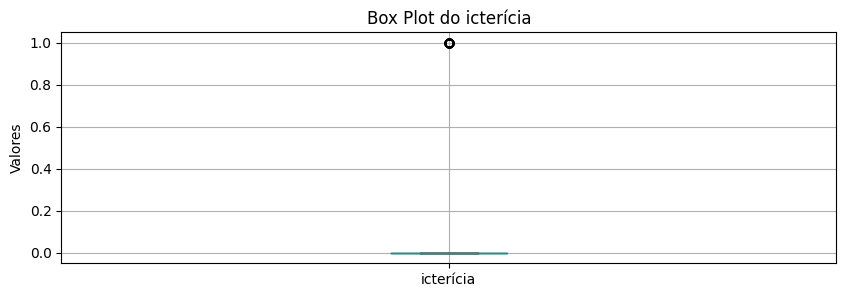

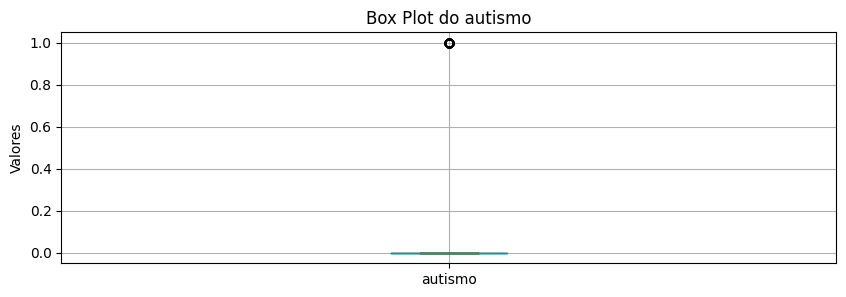

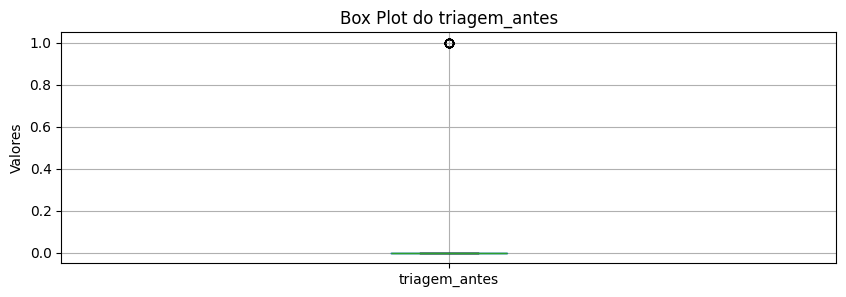

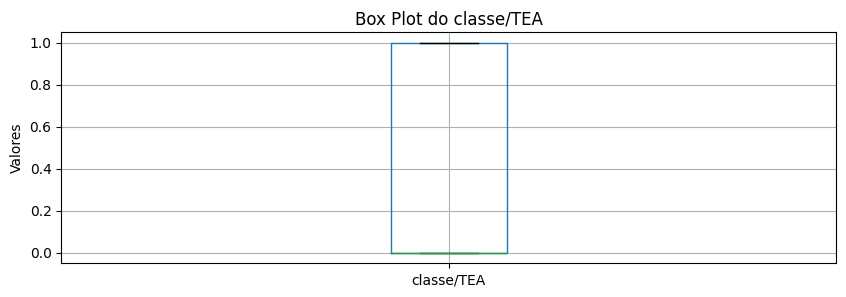

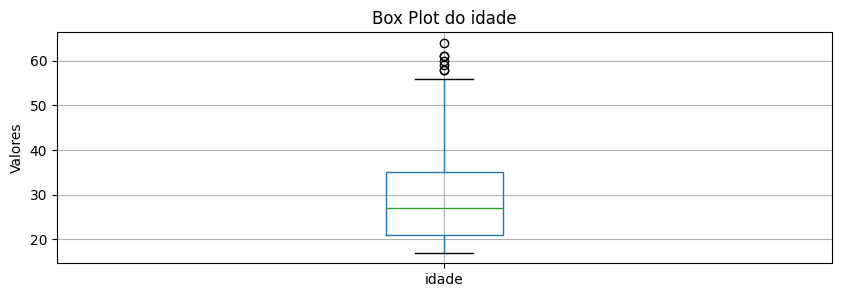

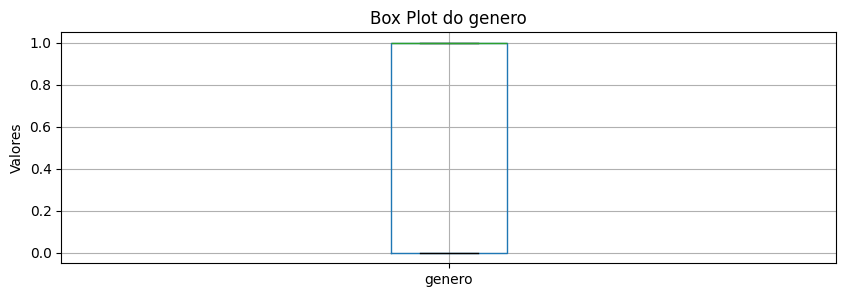

In [24]:
#Analise de balanceamento
#média em porcentagem
k = (base['icterícia'] == 0).mean() * 100
l = (base['autismo'] == 0).mean() * 100
m = (base['triagem_antes'] == 0).mean() * 100
n = (base['classe/TEA'] == 0).mean() * 100
p = (base['genero'] == 0).mean() * 100

print('\n', k, '\n', l, '\n', m, '\n', n, '\n', p)


#grafico boxplot do icterícia
plt.figure(figsize=(10, 3))
base.boxplot(column='icterícia')
plt.title('Box Plot do icterícia')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do autismo
plt.figure(figsize=(10, 3))
base.boxplot(column='autismo')
plt.title('Box Plot do autismo')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do triagem_antes
plt.figure(figsize=(10, 3))
base.boxplot(column='triagem_antes')
plt.title('Box Plot do triagem_antes')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do classe/TEA
plt.figure(figsize=(10, 3))
base.boxplot(column='classe/TEA')
plt.title('Box Plot do classe/TEA')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do idade
plt.figure(figsize=(10, 3))
base.boxplot(column='idade')
plt.title('Box Plot do idade')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do genero
plt.figure(figsize=(10, 3))
base.boxplot(column='genero')
plt.title('Box Plot do genero')
plt.ylabel('Valores')
plt.show()

In [25]:
print( base.info(), '\n número de valores nulos em cada coluna: \n', base.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 703
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   quest1          701 non-null    int64  
 1   quest2          701 non-null    int64  
 2   quest3          701 non-null    int64  
 3   quest4          701 non-null    int64  
 4   quest5          701 non-null    int64  
 5   quest6          701 non-null    int64  
 6   quest7          701 non-null    int64  
 7   quest8          701 non-null    int64  
 8   quest9          701 non-null    int64  
 9   quest10         701 non-null    int64  
 10  idade           701 non-null    float64
 11  genero          701 non-null    int64  
 12  etnia           701 non-null    object 
 13  icterícia       701 non-null    int64  
 14  autismo         701 non-null    int64  
 15  pais            701 non-null    object 
 16  triagem_antes   701 non-null    int64  
 17  resultado       701 non-null    float64


#### <font color='darkblue'>Questão 01: Eu costumo notar pequenos sons quando outros não percebem.</font>

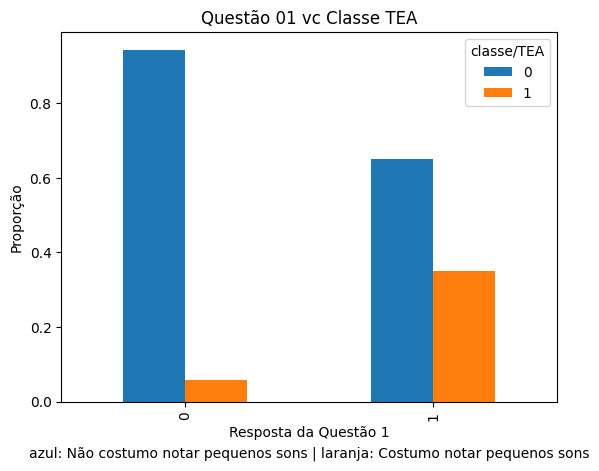

In [26]:
prop = pd.crosstab(base['quest1'], base['classe/TEA'], normalize='index')
prop.plot(kind='bar')
plt.title('Questão 01 vc Classe TEA')
plt.ylabel('Proporção')
plt.xlabel('Resposta da Questão 1')
plt.text(x=0.5, y=-.15, s='azul: Não costumo notar pequenos sons | laranja: Costumo notar pequenos sons', ha='center')
plt.show()

#### <font color='darkblue'>Questão 05: Acho fácil "ler nas entrelinhas" quando alguém está falando comigo.</font>

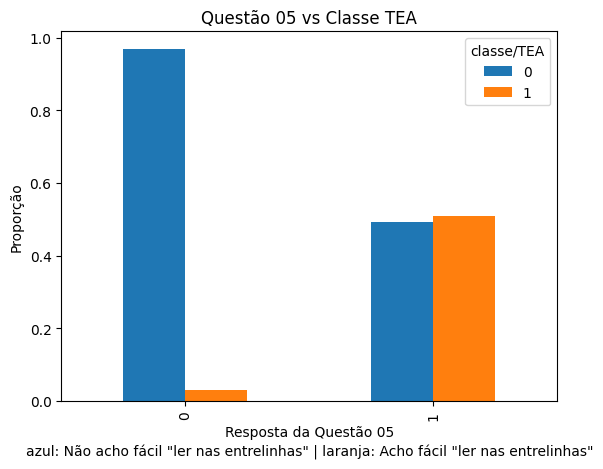

In [27]:
#quest5 ➔ Acho fácil "ler nas entrelinhas" quando alguém está falando comigo.
prop = pd.crosstab(base['quest5'], base['classe/TEA'], normalize='index')
prop.plot(kind='bar')
plt.title('Questão 05 vs Classe TEA')
plt.xlabel('Resposta da Questão 05')
plt.ylabel('Proporção')
plt.text(x=0.5, y=-.15, s='azul: Não acho fácil "ler nas entrelinhas" | laranja: Acho fácil "ler nas entrelinhas"', ha='center')
plt.show()

#### <font color='darkblue'>Questão 06: Eu sei como perceber se alguém que está me ouvindo está ficando entediado.</font>

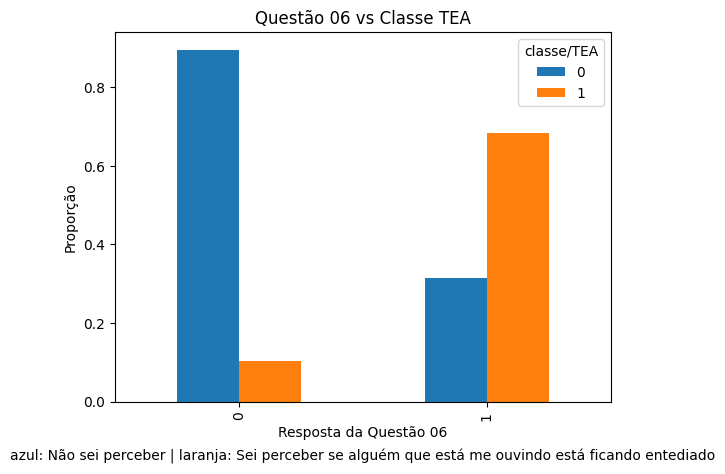

In [28]:
#quest5 ➔ Acho fácil "ler nas entrelinhas" quando alguém está falando comigo.
prop = pd.crosstab(base['quest6'], base['classe/TEA'], normalize='index')
prop.plot(kind='bar')
plt.title('Questão 06 vs Classe TEA')
plt.xlabel('Resposta da Questão 06')
plt.ylabel('Proporção')
plt.text(x=0.5, y=-.15, s='azul: Não sei perceber | laranja: Sei perceber se alguém que está me ouvindo está ficando entediado', ha='center')
plt.show()

#### <font color='darkblue'>Questão 09: Acho fácil perceber o que alguém está pensando ou sentindo apenas olhando para o seu rosto.</font>

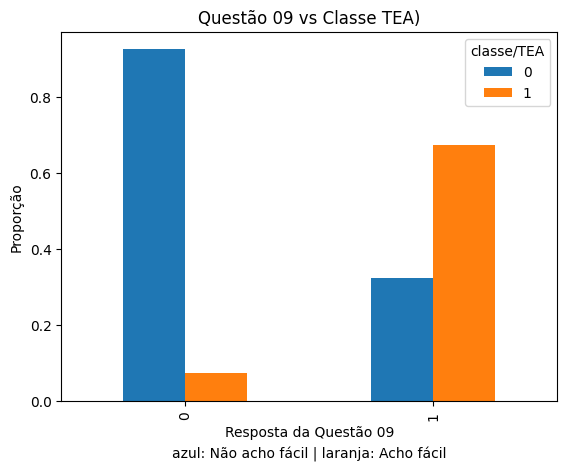

In [29]:
#quest9 ➔ Acho fácil perceber o que alguém está pensando ou sentindo apenas olhando para o seu rosto.
prop = pd.crosstab(base['quest9'], base['classe/TEA'], normalize='index')
prop.plot(kind='bar')
plt.title('Questão 09 vs Classe TEA')
plt.xlabel('Resposta da Questão 09')
plt.ylabel('Proporção')
plt.text(x=0.5, y=-.15, s='azul: Não acho fácil | laranja: Acho fácil', ha='center')
plt.show()

### <font color='darkblue'>Terceira etapa da pré-modelagem: Correlação</font>

                 quest1    quest2    quest3    quest4    quest5    quest6  \
quest1         1.000000  0.012846  0.071103  0.124896  0.171300  0.108386   
quest2         0.012846  1.000000  0.223835  0.158633  0.150301  0.185751   
quest3         0.071103  0.223835  1.000000  0.410430  0.264669  0.267080   
quest4         0.124896  0.158633  0.410430  1.000000  0.306702  0.293346   
quest5         0.171300  0.150301  0.264669  0.306702  1.000000  0.392633   
quest6         0.108386  0.185751  0.267080  0.293346  0.392633  1.000000   
quest7         0.220363 -0.045987  0.077841  0.151133  0.235482  0.175530   
quest8         0.143736  0.034212  0.012498  0.002862  0.100776  0.096923   
quest9         0.143604  0.205337  0.313280  0.325755  0.396854  0.478453   
quest10        0.119512  0.064825  0.167253  0.209858  0.264251  0.294092   
idade          0.007109  0.082764  0.098086  0.107099  0.009142  0.091864   
genero        -0.074752 -0.046072 -0.000687 -0.058356 -0.038491 -0.084888   

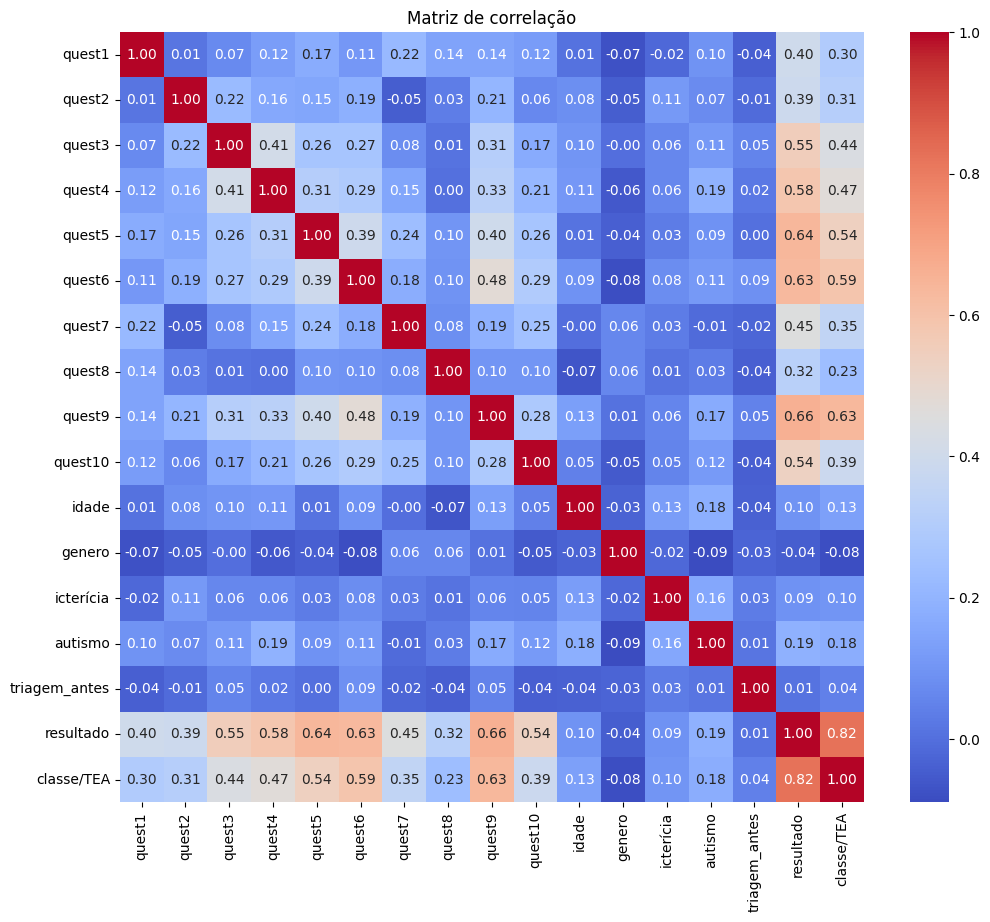

In [30]:
correlaçao = base.select_dtypes(include = ['number']).corr()
print(correlaçao)

correlation_matrix1 = base.select_dtypes(include = ['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix1, annot = True, cmap = 'coolwarm', fmt = ".2f", annot_kws = {"size": 10})
plt.title('Matriz de correlação')
plt.show()

In [31]:
base.head(5)

,quest1,quest2,quest3,quest4,quest5,quest6,quest7,quest8,quest9,quest10,...,genero,etnia,icterícia,autismo,pais,triagem_antes,resultado,mais_18,respondido_por,classe/TEA
0,1,1,1,1,0,0,1,1,0,0,...,0,White-European,0,0,United States,0,6.0,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,...,1,Latino,0,1,Brazil,0,5.0,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,...,1,Latino,1,1,Spain,0,8.0,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,0,White-European,0,1,United States,0,6.0,18 and more,Self,0
4,1,0,0,0,0,0,0,1,0,0,...,0,?,0,0,Egypt,0,2.0,18 and more,?,0


In [35]:
base_consolidado = base.copy()

In [36]:
variaveis = ['quest1', 'quest2', 'quest3', 'quest4', 'quest5', 'quest6', 'quest7', 'quest8', 'quest9', 'quest10', 'idade', 'genero', 'icterícia', 'autismo', 'pais',	'triagem_antes', 'resultado', 'mais_18', 'respondido_por', 'classe/TEA']

In [37]:
base_consolidado.to_csv('autism_screening_dados_consolidados.csv', index=False, encoding='utf-8-sig')

print("Arquivo 'autism_screening_dados_consolidados.csv' exportado com sucesso!")

Arquivo 'autism_screening_dados_consolidados.csv' exportado com sucesso!
